# Data analysis of Economic Freedom Index 

In [1]:
import pandas as pd 

#data frames (for storing data)
import numpy as np 
#scientific computing
import itertools

#matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick 
#for percentage ticks
import scikitplot as skplt 

from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

!pip install xgboost

#Decision Tree algorithm
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split 

#Data split function
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.linear_model import LinearRegression

#Decision tree plot
import pydotplus
from IPython.display import Image 

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

from collections import Counter

     |████████████████████████████████| 109.8MB 267kB/s  eta 0:00:01  |█▌                              | 5.2MB 3.8MB/s eta 0:00:28     |██▊                             | 9.4MB 3.8MB/s eta 0:00:27     |█████████████████▎              | 59.3MB 40.6MB/s eta 0:00:02


Using TensorFlow backend.


In [2]:
data = pd.read_csv("economic_freedom_index2019_data.csv",engine='python')
data.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.60,2.5,2.9,1958.0,8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.00,3.9,2.5,12507.0,13.9,2.0,1119.1,71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.90,2.0,3.1,15237.0,10.0,5.6,1203.0,25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.30,0.7,2.9,6753.0,8.2,31.7,-2254.5,65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.20,2.9,0.7,20876.0,8.7,25.7,11857.0,52.6


In [3]:
data['GDP (Billions, PPP)'] = data['GDP (Billions, PPP)'].str.replace('$', '')

In [4]:
colsToDrop = ['Country Name', 'WEBNAME','Region','Country']
Z= data.drop(colsToDrop, axis=1)
Z = Z.apply(pd.to_numeric,errors='coerce')
Z.info()
Z.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 30 columns):
CountryID                           186 non-null int64
World Rank                          180 non-null float64
Region Rank                         180 non-null float64
2019 Score                          180 non-null float64
Property Rights                     185 non-null float64
Judical Effectiveness               185 non-null float64
Government Integrity                185 non-null float64
Tax Burden                          180 non-null float64
Government Spending                 183 non-null float64
Fiscal Health                       183 non-null float64
Business Freedom                    185 non-null float64
Labor Freedom                       184 non-null float64
Monetary Freedom                    184 non-null float64
Trade Freedom                       182 non-null float64
Investment Freedom                  184 non-null float64
Financial Freedom                   181 no

(186, 30)

In [5]:
Z.describe()
Z= Z.dropna(axis=0)
Z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 185
Data columns (total 30 columns):
CountryID                           148 non-null int64
World Rank                          148 non-null float64
Region Rank                         148 non-null float64
2019 Score                          148 non-null float64
Property Rights                     148 non-null float64
Judical Effectiveness               148 non-null float64
Government Integrity                148 non-null float64
Tax Burden                          148 non-null float64
Government Spending                 148 non-null float64
Fiscal Health                       148 non-null float64
Business Freedom                    148 non-null float64
Labor Freedom                       148 non-null float64
Monetary Freedom                    148 non-null float64
Trade Freedom                       148 non-null float64
Investment Freedom                  148 non-null float64
Financial Freedom                   148 no

## Exploratory analysis


In [6]:

mean = Z.mean(axis=0)
std = Z.std(axis=0)

# Substract mean and divide by standard deviation
Z_std = (Z - mean)/std

In [7]:
N = len(Z.index)
# Let's compute the correlation matrix by hand
Z_corr = 1/(N-1)* Z_std.values.T @ Z_std.values

# You can check your result with the built-in functions .corr() and .cov()
# X_std.corr()
Z_std.corr()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Government Spending,Fiscal Health,...,Government Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
CountryID,1.000000,0.016137,-0.014225,-0.013792,0.098587,0.072443,0.069154,0.080092,-0.028356,-0.087669,...,0.045209,-0.028269,0.037271,-0.056585,0.020365,0.084554,-0.019223,0.133761,0.056000,-0.075545
World Rank,0.016137,1.000000,0.757434,-0.967725,-0.867150,-0.792309,-0.779209,0.026828,0.163361,-0.569081,...,-0.173676,0.215075,-0.291905,-0.135921,-0.021441,-0.621745,0.029733,0.166590,-0.357411,0.112972
Region Rank,-0.014225,0.757434,1.000000,-0.745210,-0.586414,-0.620131,-0.598851,-0.041900,-0.112836,-0.335492,...,0.091030,0.091654,-0.261152,-0.082292,-0.108479,-0.442605,0.067467,0.094730,-0.297893,0.160179
2019 Score,-0.013792,-0.967725,-0.745210,1.000000,0.877645,0.819623,0.813121,-0.010362,-0.119642,0.575587,...,0.122841,-0.194003,0.301153,0.219961,0.096213,0.628368,-0.054264,-0.301242,0.464951,-0.128397
Property Rights,0.098587,-0.867150,-0.586414,0.877645,1.000000,0.829817,0.860963,-0.136295,-0.382232,0.352274,...,0.394147,-0.223229,0.372983,0.116065,-0.013236,0.668743,-0.068526,-0.214602,0.425068,-0.012935
Judical Effectiveness,0.072443,-0.792309,-0.620131,0.819623,0.829817,1.000000,0.887802,-0.193624,-0.274733,0.336304,...,0.277042,-0.183052,0.323911,0.064210,-0.038959,0.630517,0.010806,-0.165965,0.395683,-0.007226
Government Integrity,0.069154,-0.779209,-0.598851,0.813121,0.860963,0.887802,1.000000,-0.234186,-0.382898,0.311995,...,0.375527,-0.219346,0.336573,0.016629,-0.033365,0.687497,-0.045040,-0.157800,0.447024,0.007738
Tax Burden,0.080092,0.026828,-0.041900,-0.010362,-0.136295,-0.193624,-0.234186,1.000000,0.290490,-0.080524,...,-0.256099,-0.052810,-0.154943,0.138845,0.199716,-0.037290,-0.154541,-0.019401,-0.014205,-0.169203
Government Spending,-0.028356,0.163361,-0.112836,-0.119642,-0.382232,-0.274733,-0.382898,0.290490,1.000000,0.036839,...,-0.984384,0.300673,-0.104728,0.289660,0.312760,-0.320988,-0.131786,-0.016925,0.068593,-0.077178
Fiscal Health,-0.087669,-0.569081,-0.335492,0.575587,0.352274,0.336304,0.311995,-0.080524,0.036839,1.000000,...,-0.076464,0.036115,0.168920,0.229337,0.109073,0.250949,-0.103327,-0.138884,0.177205,-0.320369


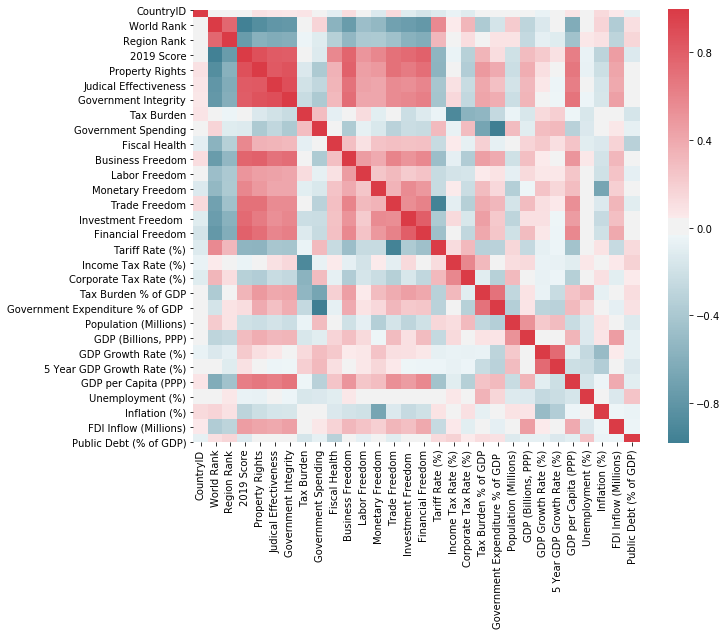

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
corr= Z.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Principal Component analysis

In [9]:
Z1 = Z.drop('2019 Score', axis=1)

mean = Z1.mean(axis=0)
std = Z1.std(axis=0)

# Substract mean and divide by standard deviation
Z1_std = (Z1 - mean)/std

N = len(Z1.index)
# Let's compute the correlation matrix by hand
Z1_corr = 1/(N-1)* Z1_std.values.T @ Z1_std.values

# You can check your result with the built-in functions .corr() and .cov()
# X_std.corr()
Z1_std.cov()

,CountryID,World Rank,Region Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Government Spending,Fiscal Health,Business Freedom,...,Government Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
CountryID,1.000000,0.016137,-0.014225,0.098587,0.072443,0.069154,0.080092,-0.028356,-0.087669,0.122501,...,0.045209,-0.028269,0.037271,-0.056585,0.020365,0.084554,-0.019223,0.133761,0.056000,-0.075545
World Rank,0.016137,1.000000,0.757434,-0.867150,-0.792309,-0.779209,0.026828,0.163361,-0.569081,-0.746463,...,-0.173676,0.215075,-0.291905,-0.135921,-0.021441,-0.621745,0.029733,0.166590,-0.357411,0.112972
Region Rank,-0.014225,0.757434,1.000000,-0.586414,-0.620131,-0.598851,-0.041900,-0.112836,-0.335492,-0.527335,...,0.091030,0.091654,-0.261152,-0.082292,-0.108479,-0.442605,0.067467,0.094730,-0.297893,0.160179
Property Rights,0.098587,-0.867150,-0.586414,1.000000,0.829817,0.860963,-0.136295,-0.382232,0.352274,0.783201,...,0.394147,-0.223229,0.372983,0.116065,-0.013236,0.668743,-0.068526,-0.214602,0.425068,-0.012935
Judical Effectiveness,0.072443,-0.792309,-0.620131,0.829817,1.000000,0.887802,-0.193624,-0.274733,0.336304,0.691670,...,0.277042,-0.183052,0.323911,0.064210,-0.038959,0.630517,0.010806,-0.165965,0.395683,-0.007226
Government Integrity,0.069154,-0.779209,-0.598851,0.860963,0.887802,1.000000,-0.234186,-0.382898,0.311995,0.724062,...,0.375527,-0.219346,0.336573,0.016629,-0.033365,0.687497,-0.045040,-0.157800,0.447024,0.007738
Tax Burden,0.080092,0.026828,-0.041900,-0.136295,-0.193624,-0.234186,1.000000,0.290490,-0.080524,-0.017083,...,-0.256099,-0.052810,-0.154943,0.138845,0.199716,-0.037290,-0.154541,-0.019401,-0.014205,-0.169203
Government Spending,-0.028356,0.163361,-0.112836,-0.382232,-0.274733,-0.382898,0.290490,1.000000,0.036839,-0.375707,...,-0.984384,0.300673,-0.104728,0.289660,0.312760,-0.320988,-0.131786,-0.016925,0.068593,-0.077178
Fiscal Health,-0.087669,-0.569081,-0.335492,0.352274,0.336304,0.311995,-0.080524,0.036839,1.000000,0.281342,...,-0.076464,0.036115,0.168920,0.229337,0.109073,0.250949,-0.103327,-0.138884,0.177205,-0.320369
Business Freedom,0.122501,-0.746463,-0.527335,0.783201,0.691670,0.724062,-0.017083,-0.375707,0.281342,1.000000,...,0.394362,-0.196570,0.285949,0.050894,-0.013814,0.505751,0.066725,-0.182773,0.325415,-0.003545


In [10]:
eigenValues, eigenVectors = np.linalg.eig(Z1_corr)

# Sort (in place) from largest to smallest eigenvalue
# and then sort the eigenvectors in the same order
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]

print(eigenValues)
print(eigenVectors)



[9.10769697 3.55666159 2.65914075 2.19489992 1.5793921  1.24632296
 1.10347317 1.07779161 0.99417151 0.77777191 0.77048877 0.6539744
 0.56768975 0.43499122 0.39158764 0.30913101 0.27281783 0.22444859
 0.20902594 0.19064554 0.15882965 0.14689598 0.12270785 0.0955376
 0.07331602 0.03240687 0.02227959 0.01677572 0.00912757]
[[ 1.11497188e-02  1.18378228e-03 -1.28312403e-01  1.93737284e-01
   1.70963525e-01  1.22244080e-01 -4.03820894e-01  6.41725830e-01
   1.30797297e-01  1.56563373e-01  2.40112215e-01 -2.82872678e-01
  -5.08645489e-02  2.62287748e-01 -1.17326781e-01  1.75819661e-01
  -6.80464624e-02 -6.21504307e-02 -2.64802625e-02 -3.38669661e-02
  -7.94298524e-02  6.72376583e-02  3.85610555e-03 -7.27434794e-02
   5.82085986e-02 -1.34765921e-02  3.72143899e-02  6.06791471e-04
  -6.06099344e-03]
 [-3.04362696e-01  1.07129639e-01 -2.84640261e-02 -1.71068032e-02
   1.25164253e-01  1.15128229e-01  8.72085988e-02  3.69199679e-02
   9.21259992e-02 -1.21304520e-01  9.55630037e-02 -5.62865722e-0

In [11]:
veclist = []
for vector in eigenVectors:
    for another in eigenVectors:
        veclist.append(vector @ another)

vectlist = np.reshape(veclist, eigenVectors.shape)
print(vectlist)

[[ 1.00000000e+00  7.21644966e-16 -1.38777878e-16  5.10008702e-16
   4.16333634e-17 -1.68615122e-15  5.75928194e-16  7.35522754e-16
  -1.93595140e-15 -4.38885039e-16  3.74700271e-16 -1.47722546e-15
   1.66533454e-16  2.31065167e-15 -2.75213879e-15 -2.77555756e-16
   8.04911693e-16  1.94289029e-16 -1.38777878e-17 -2.22044605e-16
  -1.16746890e-15  1.35807164e-15  9.40220124e-16 -7.42461648e-16
   6.10622664e-16  2.22044605e-16 -1.05471187e-15  9.36750677e-16
  -7.52246572e-16]
 [ 7.21644966e-16  1.00000000e+00 -2.85882429e-15 -4.69069228e-15
   4.82947016e-15 -8.63198402e-15 -5.82867088e-16 -8.68749517e-15
  -1.94289029e-15  7.77156117e-16 -1.38777878e-15  3.88578059e-16
  -3.38618023e-15 -2.63677968e-15 -1.27675648e-15 -1.88737914e-15
   4.57966998e-16  9.57567359e-16  2.81025203e-16 -4.55191440e-15
  -1.52655666e-16 -1.09461051e-15  2.04697370e-16  5.58580959e-16
   1.80411242e-15 -9.99200722e-16 -7.52869989e-16  2.77555756e-15
   4.43221848e-16]
 [-1.38777878e-16 -2.85882429e-15  1.0

In [12]:
pca_df = pd.DataFrame()
for i in range(eigenVectors.shape[1]):
        pca_df['PCA_cmp' + str(i + 1)] = eigenVectors[:, i] @ Z1_std.T

In [13]:
def explain_variance(orig_var, pca_var):
    orig_var_total = sum(orig_var)
    pca_var_total = sum(pca_var)

    # cumsum()
    orig_cum = np.cumsum(orig_var)
    pca_cum = np.cumsum(pca_var)

    # turn cumsum() to percentages
    orig_cum = [x / orig_var_total for x in orig_cum]
    pca_cum = [x / pca_var_total for x in pca_cum]
    
    for i in range(len(pca_cum)):
        print(f'Percentage covered by PCA with {i+1} dimension: {pca_cum[i]}')

    print('Original var cumsum\n', orig_cum)
    print('Var cumsum after pca\n', pca_cum)

    f, ax = plt.subplots()
    ax.plot(range(1, 1 + len(orig_cum)), orig_cum, '--bo', label='Original variance per column')
    ax.plot(range(1, 1 + len(pca_cum)), pca_cum, '-ro', label='PCA explained variance per component')
    plt.minorticks_on()
    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle=':')
    plt.show()      
        

Percentage covered by PCA with 1 dimension: 0.3140585161126033
Percentage covered by PCA with 2 dimension: 0.4367020193014719
Percentage covered by PCA with 3 dimension: 0.5283965279097647
Percentage covered by PCA with 4 dimension: 0.6040827319977135
Percentage covered by PCA with 5 dimension: 0.6585445285155211
Percentage covered by PCA with 6 dimension: 0.7015211822391421
Percentage covered by PCA with 7 dimension: 0.7395719812778612
Percentage covered by PCA with 8 dimension: 0.7767372090526605
Percentage covered by PCA with 9 dimension: 0.8110189852314398
Percentage covered by PCA with 10 dimension: 0.8378387062911592
Percentage covered by PCA with 11 dimension: 0.8644072844950502
Percentage covered by PCA with 12 dimension: 0.8869581260335793
Percentage covered by PCA with 13 dimension: 0.9065336346924147
Percentage covered by PCA with 14 dimension: 0.9215333319884738
Percentage covered by PCA with 15 dimension: 0.9350363539417429
Percentage covered by PCA with 16 dimension: 0.94

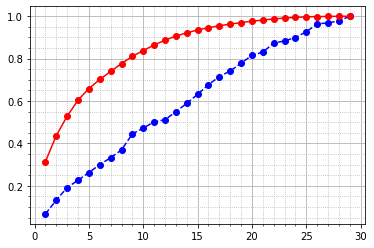

In [14]:
Z1_norm = (Z1 - Z1.min(axis=0))/(Z1.max(axis=0) - Z1.min(axis=0))
# Compute variances by column
orig_var = Z1_norm.var().tolist()
pca_var = pca_df.var().tolist()

explain_variance(orig_var, pca_var)

In [15]:
# Helper function for plotting
def plot_2d(df, title="", withMean=False, myX=1, myY=2):
    """
    Plots 2 components of the data from df, using self.interactive to show the name of
    the food when hovering with the mouse.
    :param title: str, the title of the plot
            Default: empty string
    :param withMean: bool, when True the mean of the data is shown with a red cross
            Default: False
    :param myX: int (it can take 1, 2, or 3 as values, and it must be different from myY),
            is the component used as X axis
            Default: 1 (first numerical column)
    :param myY: int (it can take 1, 2, or 3 as values, and it must be different from myX),
            is the component used as Y axis
            Default: 2 (second numerical column)
    :return: None
    """
    f, ax = plt.subplots()

    if withMean:
        ax.scatter(df[df.columns[myX]].mean(), df[df.columns[myY]].mean(),
                   marker='x', s=169, linewidths=3, color='r', zorder=10)
        
    sc = plt.scatter(df[df.columns[myX]], df[df.columns[myY]], cmap='rainbow', s=10, alpha=0.8)
 
    axes = [min(df[df.columns[0]]), max(df[df.columns[0]]),
            min(df[df.columns[1]]), max(df[df.columns[1]])]
    
    plt.axis(axes)

    ax.set_xlabel(df.columns[myX])
    ax.set_ylabel(df.columns[myY])

    plt.title(title)

    plt.show()

In [16]:
pca_df.corr()

,PCA_cmp1,PCA_cmp2,PCA_cmp3,PCA_cmp4,PCA_cmp5,PCA_cmp6,PCA_cmp7,PCA_cmp8,PCA_cmp9,PCA_cmp10,...,PCA_cmp20,PCA_cmp21,PCA_cmp22,PCA_cmp23,PCA_cmp24,PCA_cmp25,PCA_cmp26,PCA_cmp27,PCA_cmp28,PCA_cmp29
PCA_cmp1,1.000000e+00,1.603003e-16,5.751982e-16,-7.126738e-16,-4.237554e-16,3.411835e-16,5.841551e-16,-6.344642e-16,4.136330e-16,2.156632e-16,...,-6.631268e-17,-5.362665e-16,-1.292852e-16,1.118779e-15,1.008024e-15,4.436397e-17,2.169371e-15,-1.956617e-15,7.226361e-16,1.823469e-15
PCA_cmp2,1.603003e-16,1.000000e+00,-3.320302e-16,-2.389552e-16,3.811166e-16,1.115621e-16,1.502059e-16,-1.203535e-16,9.478791e-17,-6.375476e-16,...,2.284004e-16,-1.477145e-16,-3.500350e-17,1.291855e-15,5.240865e-16,4.899233e-16,-1.340325e-16,-2.538103e-15,1.048168e-15,1.974832e-15
PCA_cmp3,5.751982e-16,-3.320302e-16,1.000000e+00,8.884622e-16,3.103054e-16,1.526704e-16,-8.024403e-17,-2.319841e-17,-1.765124e-17,-1.339172e-16,...,4.759740e-16,1.650231e-16,-4.069348e-16,-2.214628e-17,-8.953091e-17,-6.683774e-16,-1.045194e-16,-1.448282e-15,1.528684e-15,7.480004e-16
PCA_cmp4,-7.126738e-16,-2.389552e-16,8.884622e-16,1.000000e+00,5.689098e-16,9.279987e-16,-7.170214e-16,3.005174e-16,2.039989e-16,-1.349728e-16,...,-4.618479e-16,-5.532302e-16,-7.639696e-16,-4.444090e-16,-2.496620e-16,-6.137672e-16,2.676078e-16,2.348036e-17,1.272282e-15,-8.297331e-16
PCA_cmp5,-4.237554e-16,3.811166e-16,3.103054e-16,5.689098e-16,1.000000e+00,1.378074e-16,-3.764375e-16,8.729349e-16,1.567078e-16,2.575809e-16,...,6.037877e-16,4.659514e-16,-2.532302e-16,4.683542e-16,1.361002e-16,1.564723e-16,-1.117506e-15,-4.187239e-16,-1.674999e-15,2.773623e-16
PCA_cmp6,3.411835e-16,1.115621e-16,1.526704e-16,9.279987e-16,1.378074e-16,1.000000e+00,-4.285927e-16,1.465547e-15,8.820441e-18,-1.403791e-16,...,1.605844e-16,4.612978e-16,-6.069784e-16,-4.072551e-16,3.575823e-16,-2.158073e-16,6.938244e-16,1.398232e-15,-1.993306e-15,-1.859450e-15
PCA_cmp7,5.841551e-16,1.502059e-16,-8.024403e-17,-7.170214e-16,-3.764375e-16,-4.285927e-16,1.000000e+00,-7.590234e-16,-6.302209e-16,-4.553120e-16,...,-2.309463e-16,6.147267e-16,4.314544e-17,-3.032518e-16,1.033943e-15,1.184925e-16,6.190492e-17,1.158440e-15,1.427996e-15,-4.511763e-16
PCA_cmp8,-6.344642e-16,-1.203535e-16,-2.319841e-17,3.005174e-16,8.729349e-16,1.465547e-15,-7.590234e-16,1.000000e+00,1.033137e-15,-3.184100e-16,...,-8.704723e-16,2.190488e-17,5.267245e-16,5.191936e-18,1.060311e-15,-4.527161e-16,1.309339e-15,-1.854499e-15,1.387337e-15,-4.606842e-16
PCA_cmp9,4.136330e-16,9.478791e-17,-1.765124e-17,2.039989e-16,1.567078e-16,8.820441e-18,-6.302209e-16,1.033137e-15,1.000000e+00,-9.808491e-16,...,7.391220e-16,9.313063e-17,-4.002048e-16,-8.584531e-16,-1.960492e-16,1.472859e-15,-1.956576e-16,1.903005e-16,-9.269386e-16,2.286843e-16
PCA_cmp10,2.156632e-16,-6.375476e-16,-1.339172e-16,-1.349728e-16,2.575809e-16,-1.403791e-16,-4.553120e-16,-3.184100e-16,-9.808491e-16,1.000000e+00,...,3.954546e-16,-5.012134e-16,-4.013549e-16,-3.795441e-16,-1.310511e-15,2.886026e-16,-1.341818e-15,5.536567e-16,-2.454668e-15,-4.231165e-16


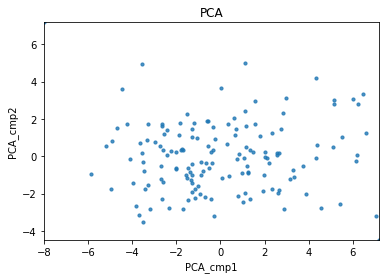

In [17]:
plot_2d(pca_df, title='PCA', myX=0, myY=1)

## Predictive analysis

### Regression

#### Linear Regression

In [18]:
X, y = Z[['Corporate Tax Rate (%)','Government Expenditure % of GDP ','GDP Growth Rate (%)','5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)']], Z['2019 Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [19]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
122,84.4,63.013965
72,90.2,72.768118
109,68.6,67.233675
7,72.0,65.024933
68,54.0,57.676145
32,49.9,46.283209
30,63.1,57.227383
39,65.3,59.213180
120,53.8,58.694057
148,47.5,54.037488


In [22]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

6.1910641232006025
63.68660508801849
7.9803887805055265


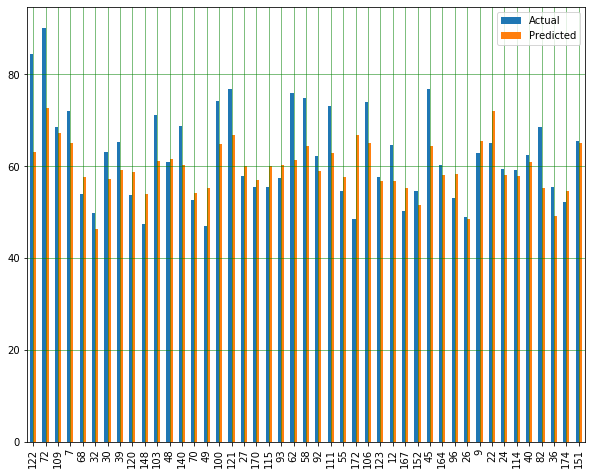

In [23]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [24]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Corporate Tax Rate (%),-0.156681
Government Expenditure % of GDP,-0.075754
GDP Growth Rate (%),0.867290
5 Year GDP Growth Rate (%),0.387251
GDP per Capita (PPP),0.000273
Unemployment (%),0.226519


#### Random Forest Regression

In [56]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [57]:
y_pred = regressor.predict(X_test)

In [58]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
122,84.4,71.0755
72,90.2,78.6092
109,68.6,69.7209
7,72.0,69.4512
68,54.0,53.9396
32,49.9,46.0302
30,63.1,54.6643
39,65.3,60.1466
120,53.8,56.9294
148,47.5,49.8748


In [59]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.465737777777798
44.19690723333346
6.648075453342377


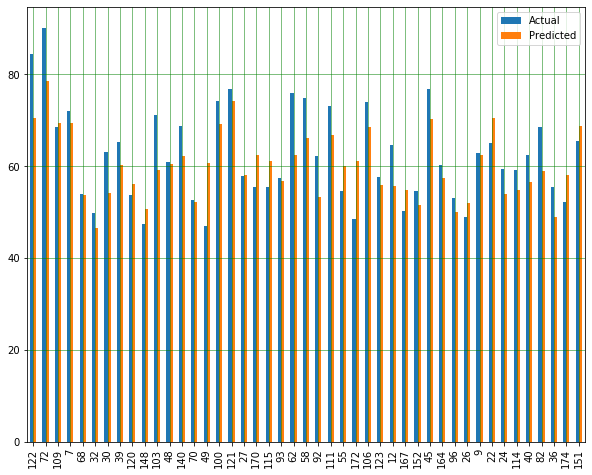

In [29]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [51]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
!pip install pydot
import pydot


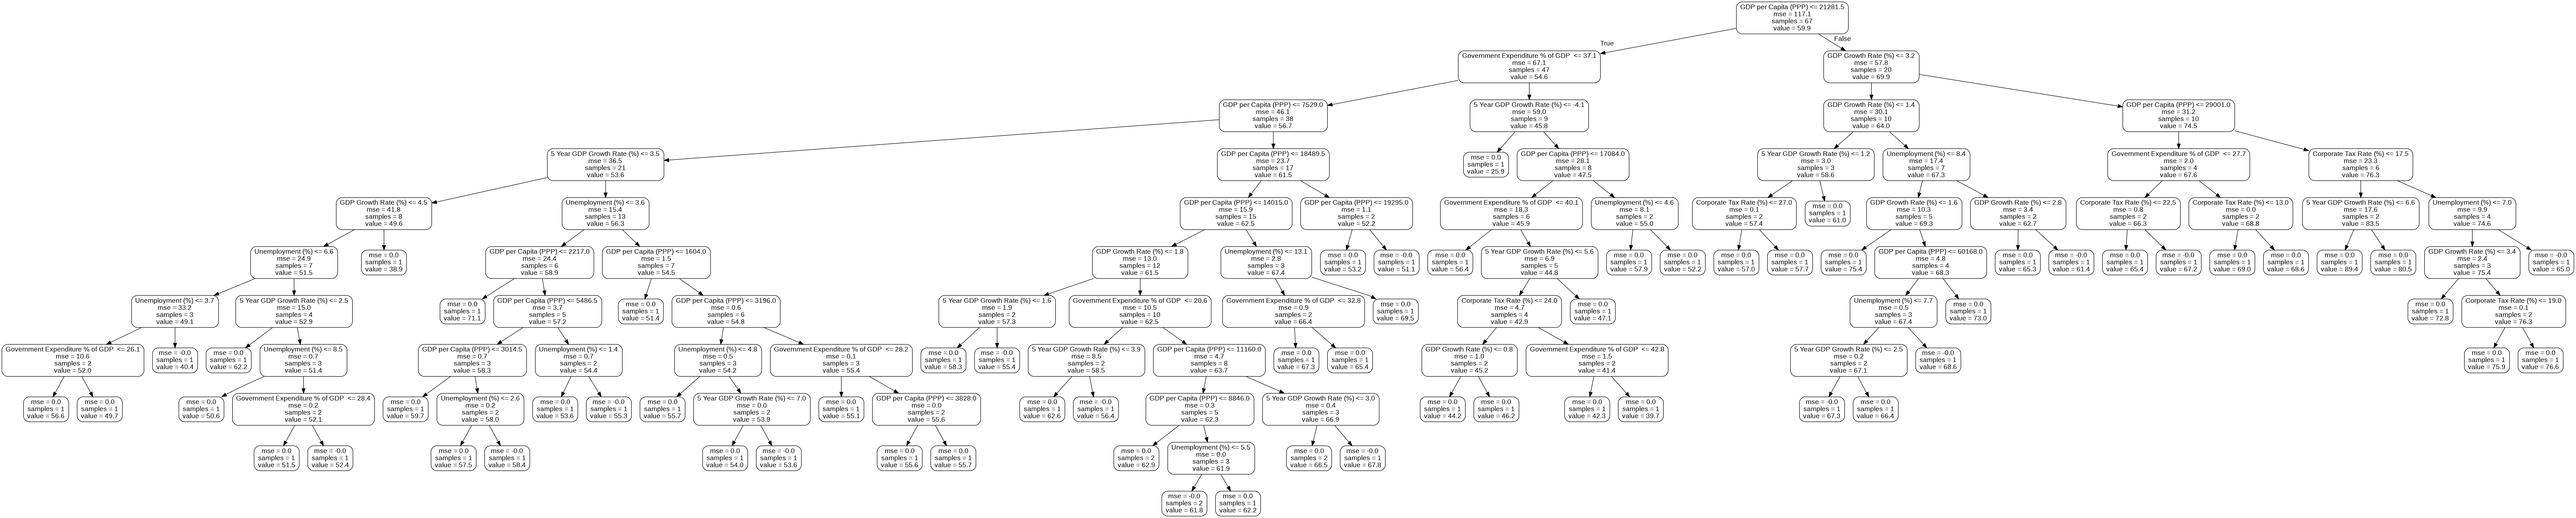

In [62]:
# Pull out one tree from the forest
tree = regressor.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

Image(graph.create_png())


In [64]:
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

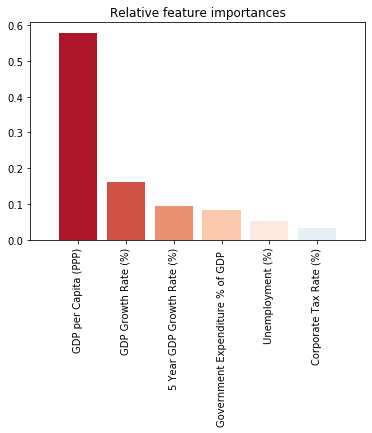

In [73]:

plt.figure()
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color= sns.color_palette("RdBu", 10),  align="center",)
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Ridge Regression

In [30]:
np.set_printoptions(suppress=True, precision=2)

In [31]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00e+09, 3.78e+09, 2.86e+09, 2.16e+09, 1.64e+09, 1.24e+09,
       9.37e+08, 7.09e+08, 5.36e+08, 4.06e+08, 3.07e+08, 2.32e+08,
       1.76e+08, 1.33e+08, 1.00e+08, 7.60e+07, 5.75e+07, 4.35e+07,
       3.29e+07, 2.49e+07, 1.88e+07, 1.42e+07, 1.08e+07, 8.15e+06,
       6.16e+06, 4.66e+06, 3.53e+06, 2.67e+06, 2.02e+06, 1.53e+06,
       1.16e+06, 8.74e+05, 6.61e+05, 5.00e+05, 3.78e+05, 2.86e+05,
       2.16e+05, 1.64e+05, 1.24e+05, 9.37e+04, 7.09e+04, 5.36e+04,
       4.06e+04, 3.07e+04, 2.32e+04, 1.76e+04, 1.33e+04, 1.00e+04,
       7.60e+03, 5.75e+03, 4.35e+03, 3.29e+03, 2.49e+03, 1.88e+03,
       1.42e+03, 1.08e+03, 8.15e+02, 6.16e+02, 4.66e+02, 3.53e+02,
       2.67e+02, 2.02e+02, 1.53e+02, 1.16e+02, 8.74e+01, 6.61e+01,
       5.00e+01, 3.78e+01, 2.86e+01, 2.16e+01, 1.64e+01, 1.24e+01,
       9.37e+00, 7.09e+00, 5.36e+00, 4.06e+00, 3.07e+00, 2.32e+00,
       1.76e+00, 1.33e+00, 1.00e+00, 7.60e-01, 5.75e-01, 4.35e-01,
       3.29e-01, 2.49e-01, 1.88e-01, 1.42e-01, 1.08e-01, 8.15e

In [32]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 6)

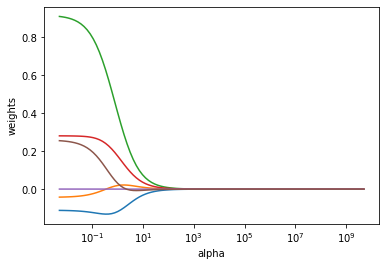

In [33]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [82]:
ridge1 = Ridge(alpha = 1, normalize = True)
ridge1.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred1 = ridge1.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge1.coef_, index = X.columns)) # Print coefficients
print(metrics.mean_absolute_error(y_test, pred1))
print(metrics.mean_squared_error(y_test, pred1))
print(np.sqrt(metrics.mean_squared_error(y_test, pred1)))     

Corporate Tax Rate (%)             -0.128873
Government Expenditure % of GDP    -0.001010
GDP Growth Rate (%)                 0.425098
5 Year GDP Growth Rate (%)          0.264549
GDP per Capita (PPP)                0.000126
Unemployment (%)                    0.009254
dtype: float64
6.789809564302067
79.67116679057112
8.925870646081037


In [34]:
ridge2 = Ridge(alpha = 10, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(metrics.mean_absolute_error(y_test, pred2))
print(metrics.mean_squared_error(y_test, pred2))
print(np.sqrt(metrics.mean_squared_error(y_test, pred2)))     

Corporate Tax Rate (%)             -0.128873
Government Expenditure % of GDP    -0.001010
GDP Growth Rate (%)                 0.425098
5 Year GDP Growth Rate (%)          0.264549
GDP per Capita (PPP)                0.000126
Unemployment (%)                    0.009254
dtype: float64
6.789809564302067
79.67116679057112
8.925870646081037


In [35]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print('\nMSE: ' + str(mean_squared_error(y_test, pred3)))

Corporate Tax Rate (%)             -3.871325e-11
Government Expenditure % of GDP     6.888543e-12
GDP Growth Rate (%)                 9.364842e-11
5 Year GDP Growth Rate (%)          7.027021e-11
GDP per Capita (PPP)                2.587481e-14
Unemployment (%)                   -1.736694e-11
dtype: float64

MSE: 109.01515647258742


#### Lasso Regression 

In [81]:
ridge2 = Ridge(alpha = 10, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print('\nMSE: ' + str(mean_squared_error(y_test, pred)))          # Calculate the test MSE

Corporate Tax Rate (%)             -0.032702
Government Expenditure % of GDP     0.004996
GDP Growth Rate (%)                 0.083024
5 Year GDP Growth Rate (%)          0.060535
GDP per Capita (PPP)                0.000023
Unemployment (%)                   -0.012452
dtype: float64

MSE: 101.69995157185284


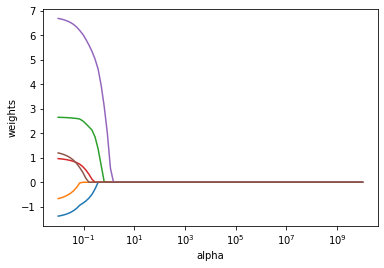

In [37]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []


for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train.astype(float)), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [78]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True,n_alphas = 1)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(pd.Series(lasso.coef_, index = X.columns))
print(metrics.mean_absolute_error(y_test, lasso.predict(X_test)))
print(metrics.mean_squared_error(y_test, lasso.predict(X_test)))
print(np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))
print('\nMSE: ' + str(mean_squared_error(y_test, lasso.predict(X_test))))

Corporate Tax Rate (%)             -0.155667
Government Expenditure % of GDP    -0.074433
GDP Growth Rate (%)                 0.866938
5 Year GDP Growth Rate (%)          0.385362
GDP per Capita (PPP)                0.000273
Unemployment (%)                    0.224336
dtype: float64
6.187044515730365
63.67727876592931
7.979804431559041

MSE: 63.67727876592931


In [79]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True,n_alphas = 10)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(pd.Series(lasso.coef_, index = X.columns))
print(metrics.mean_absolute_error(y_test, lasso.predict(X_test)))
print(metrics.mean_squared_error(y_test, lasso.predict(X_test)))
print(np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))
print('\nMSE: ' + str(mean_squared_error(y_test, lasso.predict(X_test))))

Corporate Tax Rate (%)             -0.110500
Government Expenditure % of GDP    -0.015342
GDP Growth Rate (%)                 0.845883
5 Year GDP Growth Rate (%)          0.302756
GDP per Capita (PPP)                0.000254
Unemployment (%)                    0.125304
dtype: float64
6.056725319269642
64.08909380081768
8.005566425982467

MSE: 64.08909380081768


In [80]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True,n_alphas = 100)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(pd.Series(lasso.coef_, index = X.columns))
print(metrics.mean_absolute_error(y_test, lasso.predict(X_test)))
print(metrics.mean_squared_error(y_test, lasso.predict(X_test)))
print(np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))
print('\nMSE: ' + str(mean_squared_error(y_test, lasso.predict(X_test))))

Corporate Tax Rate (%)             -0.097497
Government Expenditure % of GDP    -0.000000
GDP Growth Rate (%)                 0.835488
5 Year GDP Growth Rate (%)          0.274230
GDP per Capita (PPP)                0.000248
Unemployment (%)                    0.093913
dtype: float64
6.039920375755229
64.57008106064487
8.035551073862008

MSE: 64.57008106064487
